In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import os
import math

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# DATA

### Load Data

In [2]:
annotations = pd.read_csv('Data/task_2_annotations_82d1d6d1093eaab6_e330cbf_generic.csv')
features = pd.read_csv('Data/task_2_features_1d8b658c21ddc127_e330cbf_generic.csv')

### Show data and data types

In [3]:
annotations

,pianist_id,segment_id,annotator_id,arousal,valence,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness,gemmes_flow,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering
0,1,0,91,1,-1,2,1,2,4,2.0,1,1,1,2,3,2,1,1.0,2
1,1,0,19,2,-1,3,3,3,4,4.0,1,2,3,3,3,2,2,3.0,3
2,1,0,189,2,0,2,1,2,1,4.0,2,2,1,1,3,2,1,1.0,4
3,1,0,126,2,2,4,5,2,3,5.0,2,4,1,3,5,1,2,2.0,5
4,1,0,26,4,2,3,5,2,3,3.0,1,3,4,1,4,1,2,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2633,11,26,36,3,-1,3,2,1,4,1.0,3,2,3,5,4,2,2,5.0,3
2634,11,26,55,2,0,2,2,2,3,3.0,3,1,3,1,2,3,2,1.0,1
2635,11,26,136,2,1,2,1,1,2,2.0,2,2,1,1,2,2,1,2.0,2
2636,11,26,169,2,0,2,1,2,2,1.0,3,4,3,2,2,3,3,1.0,1


In [4]:
annotations.dtypes

pianist_id                  int64
segment_id                  int64
annotator_id                int64
arousal                     int64
valence                     int64
gems_wonder                 int64
gems_transcendence          int64
gems_tenderness             int64
gems_nostalgia              int64
gems_peacefulness         float64
gems_power                  int64
gems_joyful_activation      int64
gems_tension                int64
gems_sadness                int64
gemmes_flow                 int64
gemmes_movement             int64
gemmes_force                int64
gemmes_interior           float64
gemmes_wandering            int64
dtype: object

In [5]:
features

,pianist_id,segment_id,snippet_id,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,...,mirtoolbox_novelty_std,mirtoolbox_novelty_pct_10,mirtoolbox_novelty_pct_50,mirtoolbox_novelty_pct_90,mirtoolbox_pulseclarity,mirtoolbox_roughness_mean,mirtoolbox_roughness_std,mirtoolbox_roughness_pct_10,mirtoolbox_roughness_pct_50,mirtoolbox_roughness_pct_90
0,1,0,0,0.192237,0.059404,2.040252,16079768.0,0.800000,0.677256,0.095846,...,0.106446,0.00000,0.013819,0.082176,0.169743,0.011449,0.004161,0.006684,0.011048,0.017025
1,1,0,1,0.143425,0.064204,3.138845,35489248.0,2.600000,0.514913,0.092372,...,0.193342,0.00000,0.027786,0.356029,0.355861,0.006205,0.003194,0.002583,0.005657,0.010610
2,1,0,2,0.146967,0.056205,2.019706,42130144.0,2.600000,0.560116,0.115359,...,0.218179,0.00000,0.049050,0.375251,0.209162,0.007467,0.003986,0.002330,0.007206,0.012690
3,1,0,3,0.158810,0.059129,3.567908,40922732.0,1.400000,0.596779,0.116061,...,0.118148,0.00002,0.017653,0.098657,0.232454,0.007335,0.004063,0.002609,0.006807,0.012971
4,1,0,4,0.168547,0.049648,2.329854,51921612.0,1.600000,0.556160,0.143420,...,0.121018,0.00000,0.020525,0.157408,0.140930,0.007345,0.003917,0.002662,0.007016,0.012731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,11,26,2,0.202177,0.050760,2.840705,51977460.0,1.800000,0.688834,0.090235,...,0.203668,0.00000,0.052074,0.377220,0.269012,0.014044,0.004991,0.007948,0.013532,0.020522
2278,11,26,3,0.174454,0.063426,5.202462,9471357.0,3.200000,0.661253,0.107627,...,0.161435,0.00000,0.029478,0.251830,0.353269,0.011126,0.004529,0.005563,0.011076,0.016763
2279,11,26,4,0.161152,0.074724,4.605277,7378860.5,2.600000,0.645111,0.093705,...,0.130765,0.00000,0.025099,0.151084,0.319188,0.009205,0.004808,0.004193,0.008083,0.016254
2280,11,26,5,0.192846,0.056795,2.563405,22641664.0,3.200000,0.680604,0.094989,...,0.247554,0.00000,0.084562,0.600001,0.133573,0.013538,0.004881,0.007919,0.012861,0.019997


In [6]:
features.dtypes

pianist_id                       int64
segment_id                       int64
snippet_id                       int64
essentia_dissonance_mean       float64
essentia_dissonance_stdev      float64
                                ...   
mirtoolbox_roughness_mean      float64
mirtoolbox_roughness_std       float64
mirtoolbox_roughness_pct_10    float64
mirtoolbox_roughness_pct_50    float64
mirtoolbox_roughness_pct_90    float64
Length: 172, dtype: object

### Data cleaning

#### Null values

In [7]:
annotations.isnull().values.any()

True

In [8]:
def get_emotion(index):
    emotion = ["arousal", "valence", "gems_wonder", "gems_transcendence", "gems_tenderness",
               "gems_nostalgia", "gems_peacefulness", "gems_power", "gems_joyful_activation",
               "gems_tension", "gems_sadness", "gemmes_flow", "gemmes_movement", "gemmes_force",
               "gemmes_interior", "gemmes_wandering"]
    if index < 0 or index >= len(emotion):
        return None
    else:
        return emotion[index]
    
def check_nan(index):
    feature = get_emotion(index)
    count_nan = annotations[feature].isnull().sum()
    print ('Count NaN in ' + feature + ': ' + str(count_nan))
    
for i in range(16):
    check_nan(i)

Count NaN in arousal: 0
Count NaN in valence: 0
Count NaN in gems_wonder: 0
Count NaN in gems_transcendence: 0
Count NaN in gems_tenderness: 0
Count NaN in gems_nostalgia: 0
Count NaN in gems_peacefulness: 1
Count NaN in gems_power: 0
Count NaN in gems_joyful_activation: 0
Count NaN in gems_tension: 0
Count NaN in gems_sadness: 0
Count NaN in gemmes_flow: 0
Count NaN in gemmes_movement: 0
Count NaN in gemmes_force: 0
Count NaN in gemmes_interior: 1
Count NaN in gemmes_wandering: 0


In [9]:
annotations[annotations['gems_peacefulness'].isnull() == True]

,pianist_id,segment_id,annotator_id,arousal,valence,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness,gemmes_flow,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering
487,3,1,90,5,2,4,5,3,2,NaN,2,4,2,1,4,4,5,5.0,3


Replacing NaN value of row 487 with the mean of gems_peacefulness of segment_id==1, excluding row 487.

In [10]:
seg1 = annotations.loc[annotations['segment_id'] == 1].filter(items=["gems_peacefulness"])
annotations.at[487, 'gems_peacefulness'] = seg1.loc[seg1['gems_peacefulness'].isnull() == False].mean()

In [11]:
annotations[annotations['gems_peacefulness'].isnull() == True]

,pianist_id,segment_id,annotator_id,arousal,valence,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness,gemmes_flow,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering


In [12]:
annotations[annotations['gemmes_interior'].isnull() == True]

,pianist_id,segment_id,annotator_id,arousal,valence,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness,gemmes_flow,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering
2380,10,24,80,2,0,3,3,4,5,4.0,1,1,2,3,1,1,1,NaN,4


Replacing NaN value of row 2380 with the mean of gemmes_interior of segment_id==24, excluding row 2380.

In [13]:
seg24 = annotations.loc[annotations['segment_id'] == 24].filter(items=["gemmes_interior"])
annotations.at[2380, 'gemmes_interior'] = seg24.loc[seg24['gemmes_interior'].isnull() == False].mean()

In [14]:
annotations[annotations['gemmes_interior'].isnull() == True]

,pianist_id,segment_id,annotator_id,arousal,valence,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness,gemmes_flow,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering


#### Data normalization

In [15]:
annotations['valence']  = annotations['valence'] + 3

## QUESTION 1

## How consistent are the emotion annotations? Do different annotators agree in their ratings of the same excerpt?

To answer this questions the mean of the deviation of an annotator must be compared with the absoulte deviations of the means. The lower the mean of those deviations is, the more the annotators agreed with each other.

Two different approaches were chosen to analyse this question.

The first approach takes the pianist into account. This makes sense because the emotion of the annotation may differ according to the pianist. However, the number of annotations per segment and pianst is low, only about annotations per such group, that is calculated as follows: 2638 data instances /(27 segments * 11 pianists) = about 9. While each group of the 27 segments * 11 pianists = 297 groups may not be statistically relevant, the mean deviation of all the 297 groups may be.

The second approch ignoes the pianist assuming that the pianist has only little relevance on the annotation. The advantage of this approach is that each analyzed group consists of about 2638 rows / 27 segments = about 100 annotations, which is much more than in the first approach.

No matter which one on the two appraoches above are chosen, the result of the calulation of the mean deviation is a number that is equal or greater than zero. A value of zero would mean all annoters always agree. The value must be less then or equal to 4 if absolute deviation was calculated because the maximum value is 5 and the minimum value is 1. But assuming the the value for the mean absolute devation is a certain value betwenn 0 and 4, is it to be determined if this is a high or a low value by comparing it to a reference value.

The expected value for large N in an experiemnt with underlying uniform distribution would be that each of the five numbers would be drawn excactly once. The mean would be 3, and the mean absolute error would be (5-3)+ (4-3) + (3-3) + abs(2-3) + abs(1-3) = 6 / 5 = 1.2. Therefore, if the resulting value is equal or greater than 1.2 then the annotators do not agree. This leads to the following scale:

Level 0: deviation=0 (Annotoators agree completely)\
Level 1: 0 < deviation < 0.3\
Level 2: 0.3 <= deviation < 0.6\
Level 3: 0.6 <= deviation < 0.9\
Level 4: 0.9 <= deviation < 1.2\
Level 5: deviation >= 1.2 (Randomness)

## First approach

Generating bar chart of annotations for given segment_id, pianist_id and emotion_id:

In [16]:
def get_emotion(index):
    emotion = ["arousal", "valence", "gems_wonder", "gems_transcendence", "gems_tenderness",
               "gems_nostalgia", "gems_peacefulness", "gems_power", "gems_joyful_activation",
               "gems_tension", "gems_sadness", "gemmes_flow", "gemmes_movement", "gemmes_force",
               "gemmes_interior", "gemmes_wandering"]
    if index < 0 or index >= len(emotion):
        return None
    else:
        return emotion[index]
        
        
# segment_id between 0 and 26; pianist_id between 1 and 11; emotion_id between 0 and 15
def quesiton_1a_barchart(segment_id, pianist_id, emotion_id, show_plot=True):
    segment_all = annotations.loc[annotations['segment_id'] == segment_id]
    segment_pid = segment_all.loc[annotations['pianist_id'] == pianist_id]
    segment_emotion_all_pianists = segment_all.filter(items=[get_emotion(emotion_id)])
    segment_emotion_one_pianist = segment_pid.filter(items=[get_emotion(emotion_id)])

    x, _ = np.unique(segment_emotion_all_pianists, return_counts=True)
    x_temp, y_temp = np.unique(segment_emotion_one_pianist, return_counts=True)
    if len(x_temp) == 0:
        return math.nan
    y_one = np.zeros(len(x)).astype(np.int64)
    for i in range(len(x)):
        for j in range(len(x_temp)):
            if x_temp[j] == x[i]:
                y_one[i] = y_temp[j]
    
    mean = np.sum(x * y_one) / y_one.sum()
    deviation = 0
    for i in range(len(x)):
        deviation += abs(mean - (i+1)) * float(y_one[i])
    deviation = deviation / float(y_one.sum())
    
    if show_plot:
        plt.title(get_emotion(emotion_id) + ", segment " + str(segment_id) + ", pianist " + str(pianist_id) + "\n(mean=" + str(round(mean,3)) + ", absolute mean deviation=" + str(round(deviation, 3)) + ")")
        plt.bar(x, y_one, 0.4, label = "pianist " + str(pianist_id))
        plt.xlabel("rating")
        plt.ylabel("count")
        plt.show()
        
    return deviation

Randomly bar chart of randomly selected annotation group:

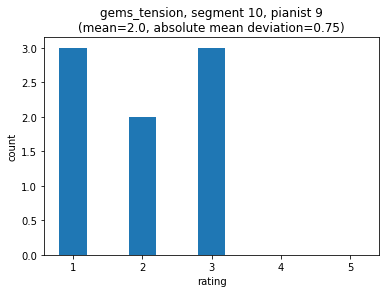

In [17]:
np.random.seed(3)
_ = quesiton_1a_barchart(np.random.randint(27), np.random.randint(11)+1, np.random.randint(16), show_plot=True)

Calculate all 27 segments * 11 pianists * 16 emotions = 4752 deviations:

In [18]:
deviations = []
for i in range(27):
    for j in range(11):
        for k in range(16):
            value = quesiton_1a_barchart(i, j+1, k, show_plot=False)
            if math.isnan(value):
                print(i, j , k)
            else:
                deviations.append(value)

deviations = np.array(deviations)

Helper function to get the segment_id, pianist_id and emotion_id from deviation index:

In [19]:
def get_segment_pianist_emotion(index):
    segment = math.floor(index / 176.0)
    value = index - (segment * 176)
    pianist = math.floor(value / 16.0) + 1
    emotion = value - ((pianist-1) * 16)
    return segment, pianist, emotion

Minimal deviation:

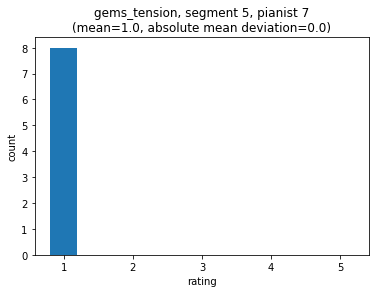

In [20]:
segment_id, pianist_id, emotion_id = get_segment_pianist_emotion(np.argmin(deviations))
_ = quesiton_1a_barchart(segment_id, pianist_id, emotion_id)

Bar chart mit maximal deviation:

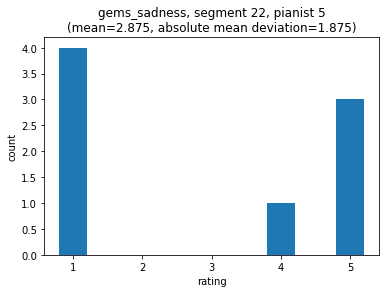

In [21]:
segment_id, pianist_id, emotion_id = get_segment_pianist_emotion(np.argmax(deviations))
_ = quesiton_1a_barchart(segment_id, pianist_id, emotion_id)

All deviations:

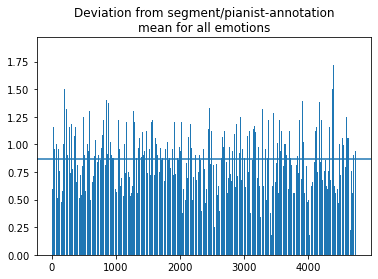

Mean deviation: 0.8710670918934905
Min deviation: 0.0
Max deviation: 1.875


In [22]:
x = range(len(deviations))
plt.title(label="Deviation from segment/pianist-annotation\nmean for all emotions")
plt.bar(x, deviations)
plt.axhline(y=np.mean(deviations))
plt.show()
print("Mean deviation:", np.mean(deviations))
print("Min deviation:", np.min(deviations))
print("Max deviation:", np.max(deviations))

#### Conclusion: On a scale from 0 to 5 where 0 means all annotators chose the same values and 5 which represents randomness, the annotators in the data agree by level 3 (because 0.871 is between 0.6 and 0.9 which is according to the above definition level 3). 

## Second approach

In [23]:
def quesiton_1b_barchart(segment_id, emotion_id, show_plot=True):
    segment_all = annotations.loc[annotations['segment_id'] == segment_id]
    segment_emotion_all_pianists = segment_all.filter(items=[get_emotion(emotion_id)])

    x = np.array(range(5)) + 1
    x_temp, y_temp = np.unique(segment_emotion_all_pianists, return_counts=True)
    y = np.zeros(5).astype(np.int64)
    for i in range(len(x)):
        for j in range(len(x_temp)):
            if x_temp[j] == x[i]:
                y[i] = y_temp[j]
    mean = np.sum(x * y) / y.sum()

    deviation = 0
    for i in range(len(x)):
        deviation += abs(mean - (i+1)) * float(y[i])
    deviation = deviation / float(y.sum())
    
    if show_plot:
        plt.title(get_emotion(emotion_id) + ", segment " + str(segment_id) + "\n(mean=" + str(round(mean,3)) + ", absolute mean deviation=" + str(round(deviation, 3)) + ")")
        plt.bar(x, y, 0.4, label = "pianist " + str(pianist_id))
        plt.xlabel("rating")
        plt.ylabel("count")
        plt.show()
        
    return deviation

Randomly bar chart of randomly selected annotation group:

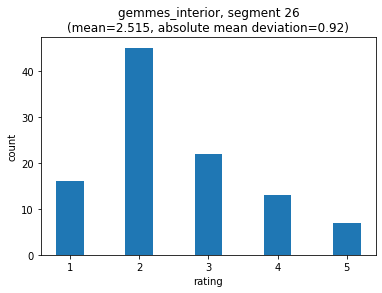

In [24]:
np.random.seed(4)
_ = quesiton_1b_barchart(np.random.randint(27), np.random.randint(16), show_plot=True)

In [25]:
deviations_1b = []
for i in range(27):
    for k in range(16):
        value = quesiton_1b_barchart(i, k, show_plot=False)
        if math.isnan(value):
            print(i, j , k)
        else:
            deviations_1b.append(value)

deviations_1b = np.array(deviations_1b)

In [26]:
def get_segment_emotion(index):
    segment = math.floor(index / 16.0)
    emotion = index - (segment * 16)
    return segment, emotion

Minimal deviation:

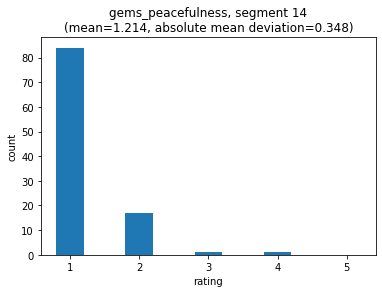

In [27]:
segment_id, emotion_id = get_segment_emotion(np.argmin(deviations_1b))
_ = quesiton_1b_barchart(segment_id, emotion_id)

Maximum deviation:

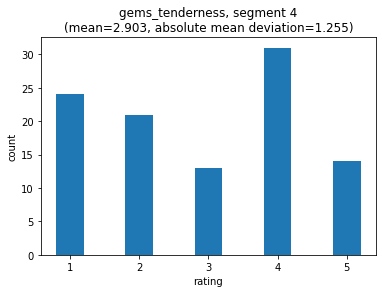

In [28]:
segment_id, emotion_id = get_segment_emotion(np.argmax(deviations_1b))
_ = quesiton_1b_barchart(segment_id, emotion_id)

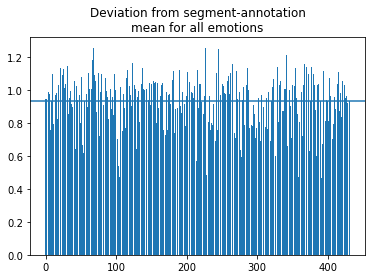

Mean devation: 0.9310148725342263
Min devation: 0.3483834480158356
Max devation: 1.2549721934206808


In [29]:
x = range(len(deviations_1b))
plt.title(label="Deviation from segment-annotation\nmean for all emotions")
plt.bar(x, deviations_1b)
plt.axhline(y=np.mean(deviations_1b))
plt.show()
print("Mean devation:", np.mean(deviations_1b))
print("Min devation:", np.min(deviations_1b))
print("Max devation:", np.max(deviations_1b))

#### Conclusion: On a scale from 0 to 5 where 0 means all annotators chose the same values and 5 which represents randomness, the annotators in the data agree by level 4 (because 0.931 is between 0.9 and 1.2 which is according to the above definition level 4). 

## QUESTION 2

## Derive discrete quadrant-based class labels from the raw arousal/valence annotations. Any ideas on how to aggregate conflicting annotations? Outliers?

An outlier is here defined an an annotions record with an opposite (conflicting) annotation quadrant the vast majority (defaulted with two third) of the other annotations for this segement and pianist. "Angry" and "Relaxed" are opposites. And "Happy" and "Sad" are opposites.

In [30]:
def four_quadrant_model(segment_id, pianist_id, threshold=2/3, show_barchart=True, show_quarants=True):
    data = annotations.loc[annotations['segment_id'] == segment_id]
    data = data.loc[data['pianist_id'] == pianist_id]
    data = data.filter(items=['arousal', 'valence']) 
    data['valence'] -= 3
    data['target'] = None
    for index in data.index:
        if data['valence'][index] <= 0 and data['arousal'][index] > 3:
            data['target'][index] = "Angry"
        elif data['valence'][index] > 0 and data['arousal'][index] >= 3:
            data['target'][index] = "Happy"
        elif data['valence'][index] < 0 and data['arousal'][index] <= 3:
            data['target'][index] = "Sad"
        elif data['valence'][index] >= 0 and data['arousal'][index] < 3:
            data['target'][index] = "Relaxed"
        elif data['valence'][index] == 0 and data['arousal'][index] == 3:
            data['target'][index] = "Center"
            
    class_name, class_count = np.unique(data['target'], return_counts=True)
    main_emotion = (class_name[np.argmax(class_count)])
    main_emotion_weight = class_count[np.argmax(class_count)] / np.sum(class_count)
    outlier = np.array([])
    
    if main_emotion_weight >= threshold:
        if main_emotion == "Angry":
            outlier = np.array(data.loc[data['target'] == "Relaxed"].index.tolist())
        elif main_emotion == "Happy":
            outlier = np.array(data.loc[data['target'] == "Sad"].index.tolist())
        elif main_emotion == "Sad":
            outlier = np.array(data.loc[data['target'] == "Happy"].index.tolist())
        elif main_emotion == "Relaxed":
            outlier = np.array(data.loc[data['target'] == "Angry"].index.tolist())
    
    if show_barchart:
        plt.title("segment " + str(segment_id) + ", pianist " + str(pianist_id))
        plt.bar(class_name, class_count)
        plt.xlabel("emotion")
        plt.ylabel("count")
        plt.show()        
        
    if show_quarants:
        plt.title("segment " + str(segment_id) + ", pianist " + str(pianist_id))
        plt.xlabel("valence")
        plt.ylabel("arousal")
        plt.scatter(data['valence'], data['arousal'])
        plt.xlim([-2.1, 2.1])
        plt.ylim([0.9, 5.1])
        plt.axhline(y=3)
        plt.axvline(x=0)
        plt.text(-2.0, 4.8, "Angry", horizontalalignment='left', size='medium', color='black', weight='semibold')
        plt.text(1.5, 4.8, "Happy", horizontalalignment='left', size='medium', color='black', weight='semibold')
        plt.text(-2.0, 1.1, "Sad", horizontalalignment='left', size='medium', color='black', weight='semibold')
        plt.text(1.5, 1.1, "Relaxed", horizontalalignment='left', size='medium', color='black', weight='semibold')
        plt.show()
        
    return data, outlier, class_name, class_count
    

Calculate and visualize outliers:

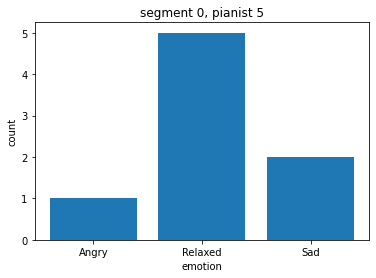

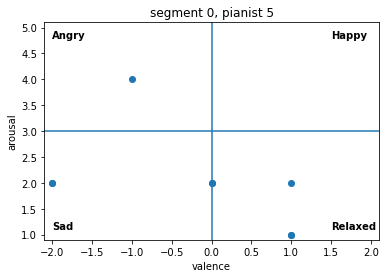

     arousal  valence   target
947        2       -2      Sad
948        4       -1    Angry
949        1        1  Relaxed
950        2        0  Relaxed
951        2        0  Relaxed
952        2        1  Relaxed
953        1        1  Relaxed
954        2       -2      Sad


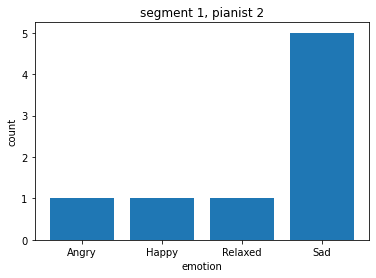

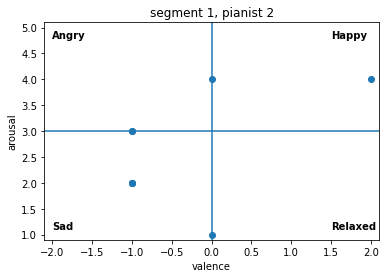

     arousal  valence   target
266        2       -1      Sad
267        2       -1      Sad
268        2       -1      Sad
269        3       -1      Sad
270        4        2    Happy
271        3       -1      Sad
272        1        0  Relaxed
273        4        0    Angry


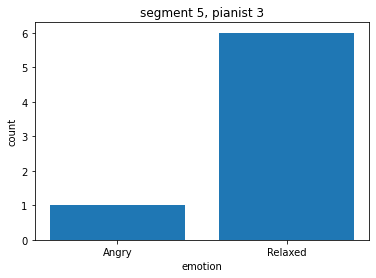

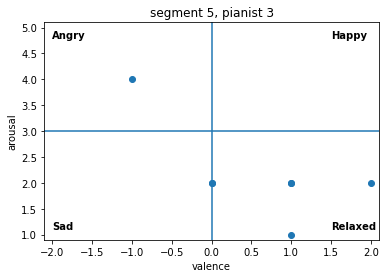

     arousal  valence   target
521        1        1  Relaxed
522        2        0  Relaxed
523        4       -1    Angry
524        2        1  Relaxed
525        2        2  Relaxed
526        2        1  Relaxed
527        2        0  Relaxed


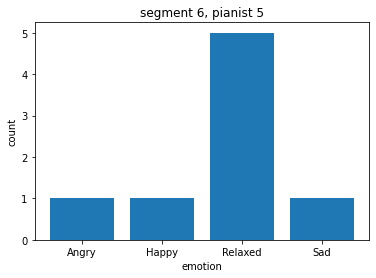

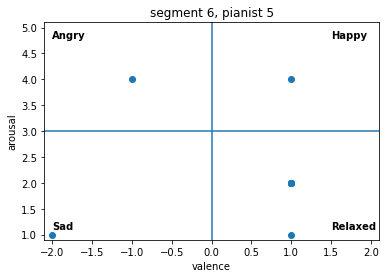

      arousal  valence   target
995         2        1  Relaxed
996         2        1  Relaxed
997         2        1  Relaxed
998         2        1  Relaxed
999         1        1  Relaxed
1000        4       -1    Angry
1001        1       -2      Sad
1002        4        1    Happy


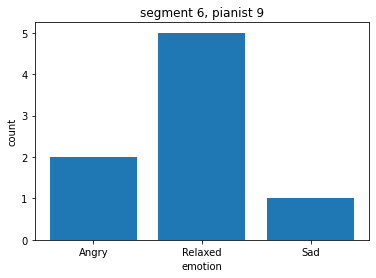

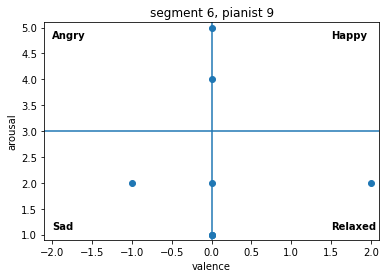

      arousal  valence   target
1965        1        0  Relaxed
1966        1        0  Relaxed
1967        2       -1      Sad
1968        2        0  Relaxed
1969        4        0    Angry
1970        1        0  Relaxed
1971        5        0    Angry
1972        2        2  Relaxed


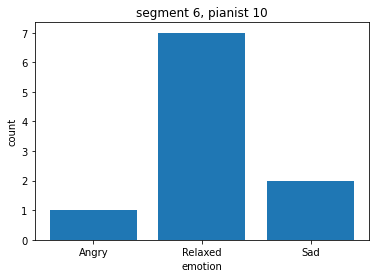

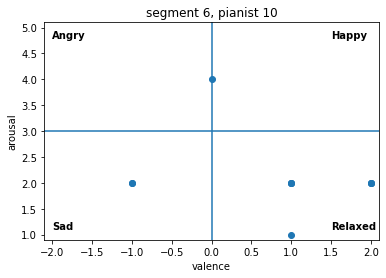

      arousal  valence   target
2186        2        1  Relaxed
2187        2       -1      Sad
2188        2        2  Relaxed
2189        2       -1      Sad
2190        2        1  Relaxed
2191        4        0    Angry
2192        1        1  Relaxed
2193        2        2  Relaxed
2194        2        2  Relaxed
2195        2        1  Relaxed


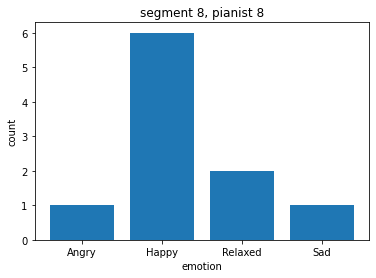

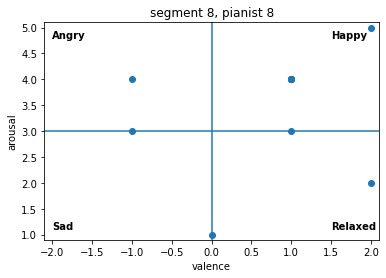

      arousal  valence   target
1739        4        1    Happy
1740        4        1    Happy
1741        5        2    Happy
1742        3       -1      Sad
1743        4        1    Happy
1744        4       -1    Angry
1745        4        1    Happy
1746        2        2  Relaxed
1747        3        1    Happy
1748        1        0  Relaxed


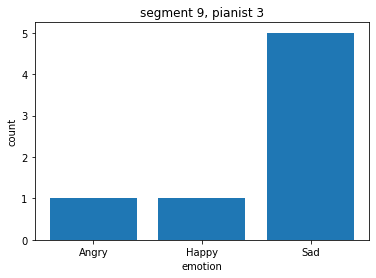

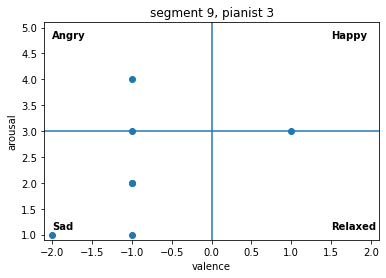

     arousal  valence target
557        1       -2    Sad
558        3        1  Happy
559        4       -1  Angry
560        2       -1    Sad
561        2       -1    Sad
562        3       -1    Sad
563        1       -1    Sad


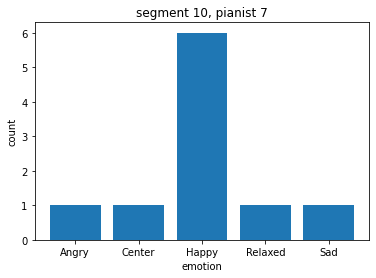

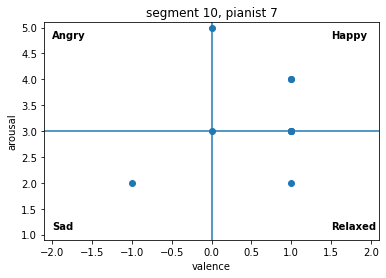

      arousal  valence   target
1509        4        1    Happy
1510        2        1  Relaxed
1511        5        0    Angry
1512        3        0   Center
1513        3        1    Happy
1514        2       -1      Sad
1515        3        1    Happy
1516        4        1    Happy
1517        3        1    Happy
1518        3        1    Happy


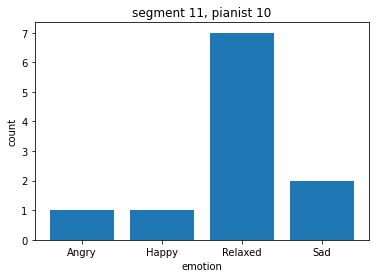

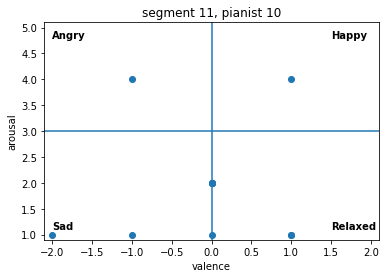

      arousal  valence   target
2238        1       -1      Sad
2239        1        1  Relaxed
2240        2        0  Relaxed
2241        2        0  Relaxed
2242        1       -2      Sad
2243        2        0  Relaxed
2244        1        1  Relaxed
2245        1        0  Relaxed
2246        4        1    Happy
2247        4       -1    Angry
2248        2        0  Relaxed


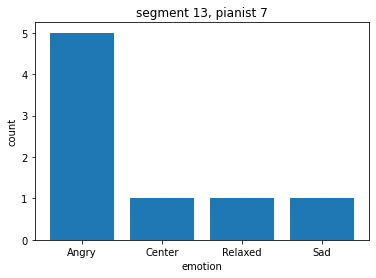

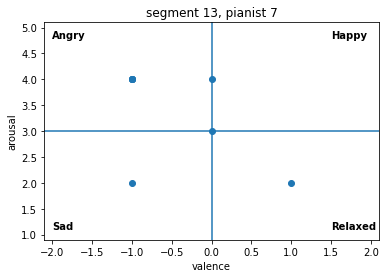

      arousal  valence   target
1537        4       -1    Angry
1538        3        0   Center
1539        4       -1    Angry
1540        2       -1      Sad
1541        4        0    Angry
1542        2        1  Relaxed
1543        4       -1    Angry
1544        4       -1    Angry


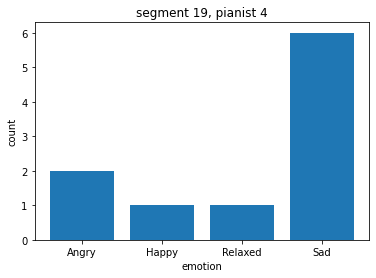

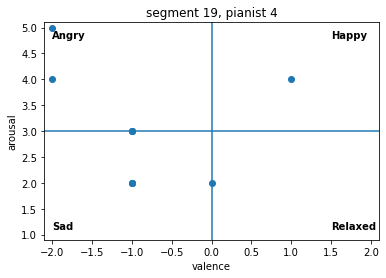

     arousal  valence   target
879        2       -1      Sad
880        5       -2    Angry
881        2        0  Relaxed
882        3       -1      Sad
883        3       -1      Sad
884        4       -2    Angry
885        2       -1      Sad
886        3       -1      Sad
887        4        1    Happy
888        2       -1      Sad


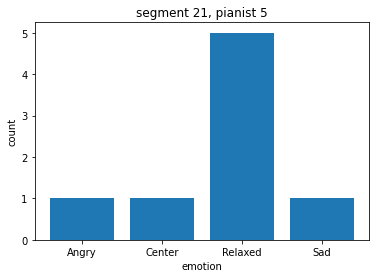

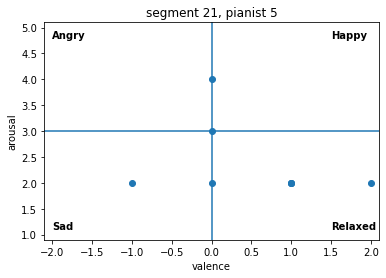

      arousal  valence   target
1115        2        1  Relaxed
1116        4        0    Angry
1117        2        1  Relaxed
1118        2       -1      Sad
1119        3        0   Center
1120        2        2  Relaxed
1121        2        1  Relaxed
1122        2        0  Relaxed


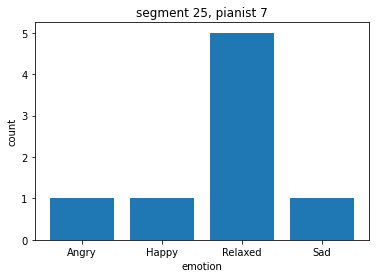

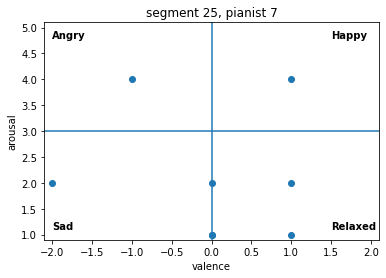

      arousal  valence   target
1645        1        1  Relaxed
1646        4        1    Happy
1647        1        0  Relaxed
1648        2        0  Relaxed
1649        1        0  Relaxed
1650        2        1  Relaxed
1651        4       -1    Angry
1652        2       -2      Sad

Indices of outlier: 270, 523, 558, 887, 948, 1000, 1116, 1514, 1542, 1651, 1742, 1969, 1971, 2191, 2247


In [31]:
all_outlier = np.array([]).astype(int)
for i in range(27):
    for j in range(11):
        data, outlier, _, _ = four_quadrant_model(i,j+1, threshold=0.6, show_barchart=False, show_quarants=False)
        if outlier.shape[0] > 0:
            all_outlier = np.append(all_outlier, outlier) 
            _, _, _, _ = four_quadrant_model(i,j+1, show_barchart=True, show_quarants=True)
            print(data)
            
all_outlier = np.sort(all_outlier)
print("\nIndices of outlier: ", end = '')
print(*all_outlier, sep=', ')

## QUESTION 3

## How are the resulting discrete class labels distributed? Are the classes unbalanced, and how much? How are the features distributed? Are there any pairs or subsets of features that seem highly correlated or redundant?

In [32]:
count_angry = 0
count_happy = 0
count_sad = 0
count_relaxed = 0

all_outlier = np.array([]).astype(int)
for i in range(27):
    for j in range(11):
        _, _ , class_name, class_count = four_quadrant_model(i,j+1, show_barchart=False, show_quarants=False)
        for i in range(class_name.shape[0]):
            if class_name[i] == "Angry":
                count_angry += class_count[i]
            elif class_name[i] == "Happy":
                count_happy += class_count[i]
            elif class_name[i] == "Sad":
                count_sad += class_count[i]
            elif class_name[i] == "Relaxed":
                count_relaxed += class_count[i]

print("Angry: ", count_angry)
print("Happy: ", count_happy)
print("Sad: ", count_sad)
print("Relaxed: ", count_relaxed)

Angry:  623
Happy:  655
Sad:  662
Relaxed:  464


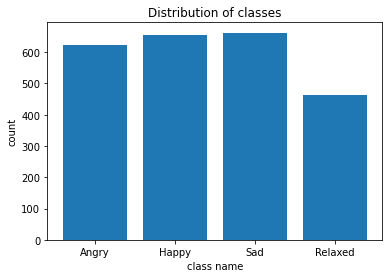

In [33]:
labels = ["Angry", "Happy", "Sad", "Relaxed"]
label_indices = [1, 2, 3, 4]
label_count = [count_angry, count_happy, count_sad, count_relaxed]
plt.title("Distribution of classes")
plt.bar(label_indices, label_count, align='center')
plt.xticks(label_indices, labels)
plt.xlabel("class name")
plt.ylabel("count")
plt.show() 

The classes "angry", "happy" and "sad" are more or less equally distributed. The class "relaxed", however, occurs significantly less fequent.

Bar charts of all 16 annotated emotions:

In [34]:
def feature_distribution(emotion_id, show_plot=True):
    data = annotations.filter(items=[get_emotion(emotion_id)])
    x, _ = np.unique(data, return_counts=True)
    x_temp, y_temp = np.unique(data, return_counts=True)
    if len(x_temp) == 0:
        return math.nan
    y = np.zeros(len(x)).astype(np.int64)
    for i in range(len(x)):
        for j in range(len(x_temp)):
            if x_temp[j] == x[i]:
                y[i] = y_temp[j]
        
    if show_plot:
        plt.title("Feature: " + get_emotion(emotion_id))
        plt.bar(x, y)
        plt.xlabel("rating")
        plt.ylabel("count")
        plt.show()
        

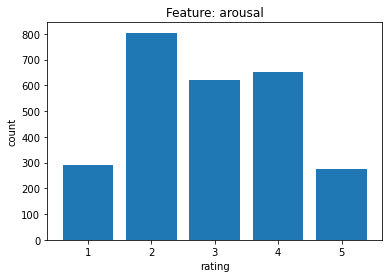

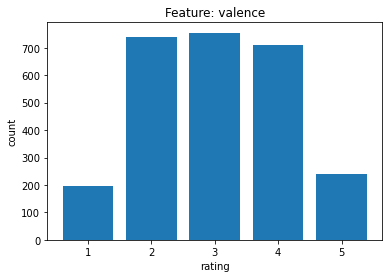

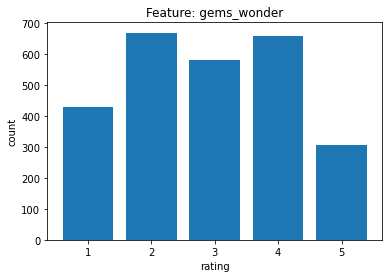

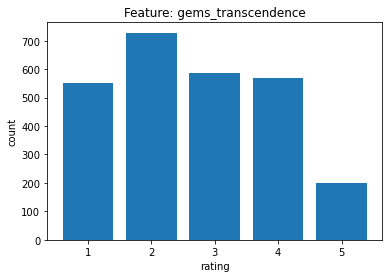

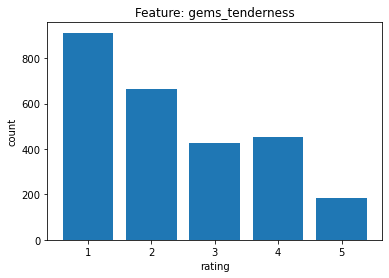

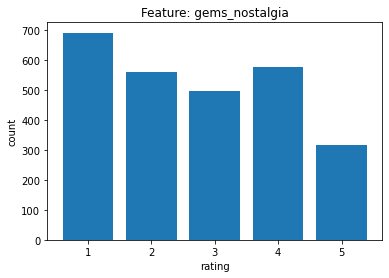

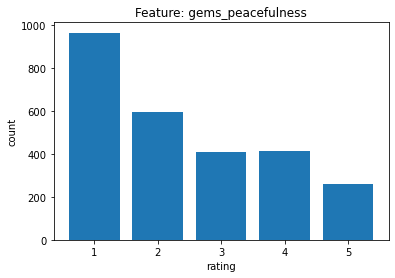

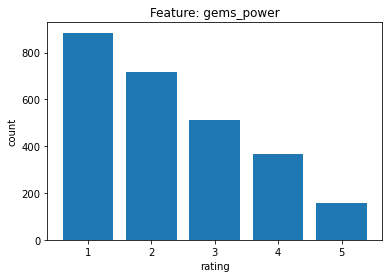

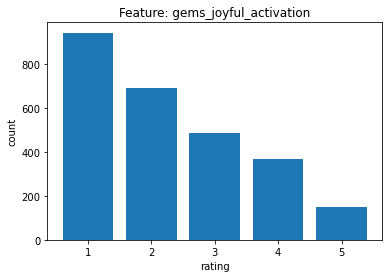

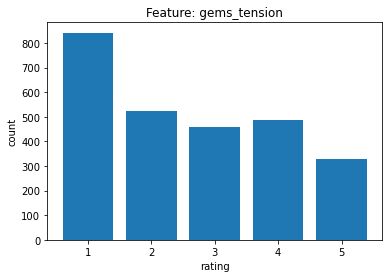

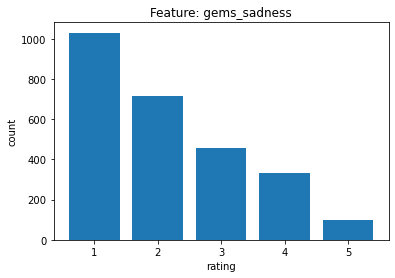

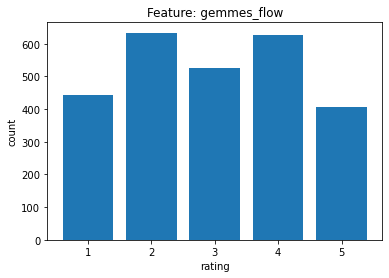

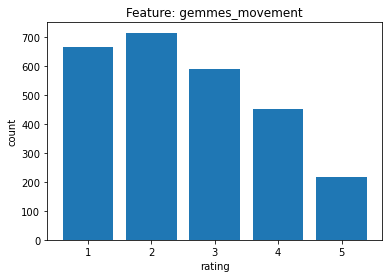

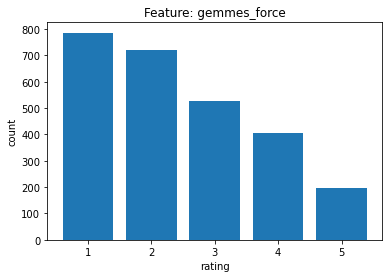

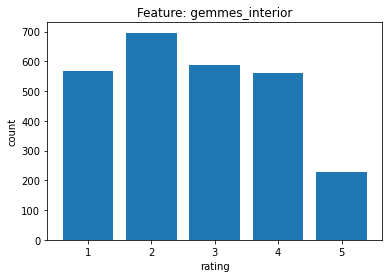

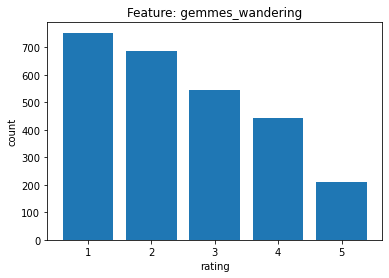

In [35]:
for i in range(16):
    feature_distribution(i)

Correlations:

In [36]:
corr_data = annotations.copy()
corr_data = corr_data.drop('pianist_id', axis=1)
corr_data = corr_data.drop('segment_id', axis=1)
corr_data = corr_data.drop('annotator_id', axis=1)
result = corr_data.corr(method="pearson")

print("Correlation:")
for i in range(16):
    for j in range(16):
        if i > j:
            if(abs(result[get_emotion(i)][j]) >= 0.55):
                print(get_emotion(i), get_emotion(j), round(result[get_emotion(i)][j], 3))

Correlation:
gems_peacefulness gems_tenderness 0.569
gemmes_flow gems_peacefulness 0.576
gemmes_force gems_power 0.673
